In [115]:
### Calculate the sensing matrix for hard and soft mode matching
import numpy as np
import pykat
import matplotlib.pyplot as pl

%matplotlib inline

In [124]:
### Start with the simple case

Lambda = 1064e-9

L = 3994.5
R1 = 1940.30 
R2 =  2244.2

delta = np.linspace(-1,1,100)

In [117]:
R1_vec = R1 + delta
R2_vec = R2 + delta

X, Y = np.meshgrid(R1_vec, R2_vec)

In [118]:
Z = cavity_info(Lambda, L, X, Y)

In [119]:
#Calculate Eigenmode
def cavity_info(Lambda, L, Rc1, Rc2):
    """
    Function computes several cavity paramaters
    Input: Lambda, L (length), Rc1, Rc2 (radii of curvature of cavity mirrors)
    Output: zr (Rayleigh range), w0 (waist size), z1 (distance waist<->mirror1)
            w1, w2 (spot size on both mirrors)
    See examples/optics/cavity_w_Rc.py for an example usage.
    """
    g1 = 1-L/Rc1
    g2 = 1-L/Rc2
    G  = g1*g2
    G1 = (g1+g2-2*G)

    k = 2.0*np.pi/Lambda

    zr = np.sqrt( L**2 * G * (1.0-G)/G1**2) 
    z1 = L * g2 * (1-g1) / G1
    z2 = L * g1 * (1-g2) / G1
    w0 =  np.sqrt( zr * Lambda / np.pi ) 
    w1 = np.sqrt( L * Lambda /np.pi * np.sqrt( g2 / (g1 * (1-G)) ))
    w2 = np.sqrt( L * Lambda /np.pi * np.sqrt( g1 / (g2 * (1-G)) ))
    return [zr, w0, z1, w1, w2]

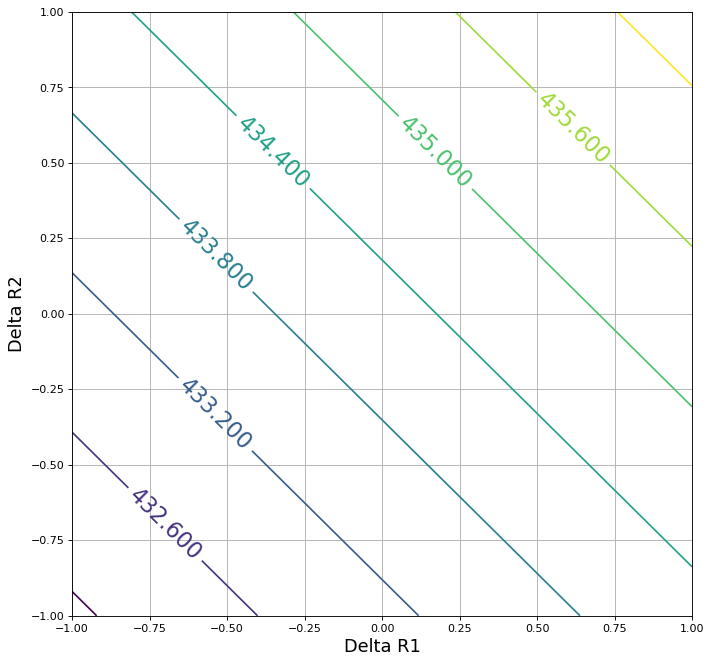

In [144]:
#### Plot
pl.figure(figsize=(10, 10), dpi=80)

CS = pl.contour(X-R1,Y-R2,Z[0])
#DS = pl.contour(X-R1,Y-R2,Z[2])

pl.clabel(CS, inline=1, fontsize=20)
#pl.clabel(DS, inline=1, fontsize=20)

pl.xlabel("Delta R1",fontsize=16)
pl.ylabel("Delta R2",fontsize=16)
pl.grid()

pl.show()

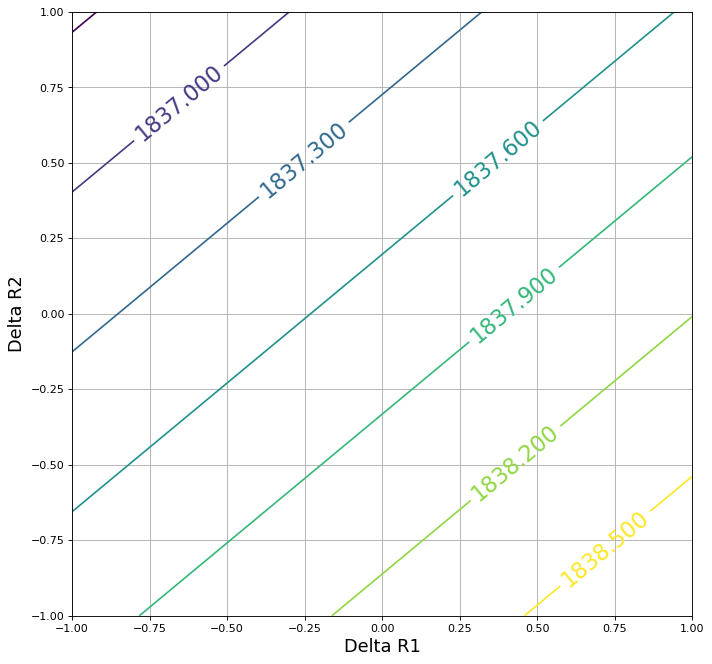

In [142]:
#### Plot
pl.figure(figsize=(10, 10), dpi=80)

CS = pl.contour(X-R1,Y-R2,Z[2])

pl.clabel(CS, inline=1, fontsize=20)

pl.xlabel("Delta R1",fontsize=16)
pl.ylabel("Delta R2",fontsize=16)

pl.grid()

pl.show()

In [154]:
# Calculate the sensing matrix by adding one meter to both radii of curvature
orig = cavity_info(Lambda, L, R1, R2)
hard = cavity_info(Lambda, L, R1-1, R2+1)
soft = cavity_info(Lambda, L, R1+1, R2+1)
print(hard)
print(soft)

[434.1798042326459, 0.01212636641409883, 1836.6615455381786, 0.05271062111112994, 0.06147493091025713]
[436.47601164627014, 0.012158389937930935, 1837.627573964497, 0.052612721148169624, 0.06129928846731849]


In [156]:
soft[0]-orig[0], hard[2]-orig[2]

(2.277796749621814, -1.0499408595082969)

In [164]:
### Sensing matrix to get the R1 and R2 actuator basis to waist size and location basis in meters/meters. 
### you also need a 1/sqrt(2) to rotate the vectors


np.multiply([ [hard[2]-orig[2], -(hard[2]-orig[2])],[soft[0]-orig[0], soft[0]-orig[0]] ],1/np.sqrt(2))

array([[-0.7424203 ,  0.7424203 ],
       [ 1.61064553,  1.61064553]])